Scott Otto
Module 5 Homework
Weatherpy

My Observations:
First, I'd like to say that the analysis that was provided as an example stole the analysis :)
1.  Latitude vs Wind Speed:  It is interesting that in the extremes of latitude (nearest the poles), there appear to be higher outlying wind speeds.  However, the thickest band of wind speed across appears to be from 0-15 mph.
2.  Latitude vs Humidity (%):  The thicker band of humidity appears to be in the 60-100% range.  Although we often consider the winter months to be dry rather than humid, that is actually inside our homes and is attributed to forced air heating.  Outside, there are dry cold and humid cold days.
3.  General:  The random cities appears to have been northern hemisphere heavy.  It would be easy to draw improper conclusions from this data due to that effect alone.




In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#get date of api request
req_date = datetime.datetime.now()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#establish base URL and dataframe
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
full_data_df = pd.DataFrame({"city" : [],
                            "cloudiness" : [],
                            "country" : [],
                            "date" : [],
                            "humidity" : [],
                            "lat" : [],
                            "lon" : [],
                            "max temp" : [],
                            "wind speed" : []
                            })


In [4]:
#build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# i is found cities
i = 0
# j is skipped cities
j = 0

print("Beginning Data Retreival")
print("-------------------------")

for city_name in cities:
    response_request = requests.get(query_url+city_name)
    response = response_request.json()
    
    if (response["cod"] == 200):
        i = i + 1
        print(f"found city {i} -- {city_name}")
#        print(response_request.url)
        
#        print(json.dumps(response, indent=2))
        full_data_df.loc[i,"city"] = response["name"]
        full_data_df.loc[i,"cloudiness"] = response["clouds"]["all"]
        full_data_df.loc[i,"country"] = response["sys"]["country"]
        full_data_df.loc[i,"date"] = req_date.strftime("%d-%m-%Y")
#        full_data_df.loc[i,"date"] = pd.to_datetime.(response["dt"], unit = "s")
        full_data_df.loc[i,"humidity"] = response["main"]["humidity"]
        full_data_df.loc[i,"lat"] = response["coord"]["lat"]
        full_data_df.loc[i,"lon"] = response["coord"]["lon"]
        full_data_df.loc[i,"max temp"] = response["main"]["temp_max"]
        full_data_df.loc[i,"wind speed"] = response["wind"]["speed"]
    else:
        j = j + 1
        print(f"Skipping {city_name} not found {j}.")
        
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")
print(f"Total cities found: {i}")
print(f"Total cities skipped: {j}")
print("-------------------------")
    

Beginning Data Retreival
-------------------------
found city 1 -- cabo san lucas
found city 2 -- sebinkarahisar
found city 3 -- sorong
found city 4 -- portland
found city 5 -- kapaa
found city 6 -- pevek
found city 7 -- hobart
Skipping warqla not found 1.
found city 8 -- qaanaaq
found city 9 -- byron bay
found city 10 -- buchanan
found city 11 -- otofuke
found city 12 -- rikitea
Skipping galgani not found 2.
found city 13 -- albany
found city 14 -- tasiilaq
found city 15 -- puerto carreno
found city 16 -- hermanus
found city 17 -- auki
found city 18 -- klaksvik
found city 19 -- abu samrah
found city 20 -- atambua
found city 21 -- lubsko
found city 22 -- cape town
found city 23 -- esperance
Skipping rungata not found 3.
found city 24 -- longyearbyen
found city 25 -- ushuaia
found city 26 -- jamestown
found city 27 -- punta arenas
found city 28 -- caravelas
found city 29 -- chuy
found city 30 -- mabaruma
found city 31 -- narsaq
Skipping mys shmidta not found 4.
Skipping toliary not foun

found city 271 -- altay
found city 272 -- savonlinna
found city 273 -- puerto suarez
found city 274 -- jiuquan
found city 275 -- road town
found city 276 -- los llanos de aridane
found city 277 -- dwarka
Skipping bairiki not found 29.
found city 278 -- koindu
found city 279 -- tiksi
found city 280 -- glace bay
Skipping olafsvik not found 30.
found city 281 -- vermillion
found city 282 -- taseyevo
found city 283 -- srednekolymsk
found city 284 -- alofi
found city 285 -- akom
found city 286 -- dingle
found city 287 -- mbini
found city 288 -- kaeo
Skipping bacuit not found 31.
found city 289 -- usinsk
found city 290 -- grindavik
Skipping mutsamudu not found 32.
found city 291 -- cranbrook
found city 292 -- norman wells
found city 293 -- pangnirtung
Skipping utiroa not found 33.
Skipping yanan not found 34.
found city 294 -- nichinan
found city 295 -- ilulissat
Skipping kerzhenets not found 35.
found city 296 -- mandalgovi
Skipping santa eulalia del rio not found 36.
found city 297 -- ust-

found city 534 -- quatre cocos
found city 535 -- haines junction
found city 536 -- awbari
found city 537 -- misratah
found city 538 -- beni suef
found city 539 -- plock
found city 540 -- concepcion del oro
found city 541 -- craig
found city 542 -- traralgon
found city 543 -- fenoarivo
found city 544 -- trairi
found city 545 -- paoua
found city 546 -- ponta delgada
found city 547 -- portel
found city 548 -- salta
found city 549 -- halifax
found city 550 -- ibiruba
found city 551 -- doha
found city 552 -- warrington
Skipping marcona not found 62.
found city 553 -- orlik
found city 554 -- patzcuaro
found city 555 -- alibag
found city 556 -- laem sing
found city 557 -- dagua
-------------------------
Data Retrieval Complete
-------------------------
Total cities found: 557
Total cities skipped: 62
-------------------------


In [5]:
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")
print(f"Total cities found: {i}")
print(f"Total cities skipped: {j}")
print("-------------------------")

-------------------------
Data Retrieval Complete
-------------------------
Total cities found: 557
Total cities skipped: 62
-------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#export to csv
full_data_df.to_csv("output_data/cities.csv")

In [8]:
#display dataframe head (started with a dataframe, so no conversion)
full_data_df.head()

,city,cloudiness,country,date,humidity,lat,lon,max temp,wind speed
1,Cabo San Lucas,5.0,MX,06-04-2019,60.0,22.89,-109.91,79.00,17.22
2,Sebinkarahisar,0.0,TR,06-04-2019,83.0,40.29,38.42,27.29,2.17
3,Sorong,8.0,ID,06-04-2019,100.0,-0.86,131.25,81.56,3.40
4,Portland,40.0,US,06-04-2019,71.0,45.52,-122.67,59.00,8.05
5,Kapaa,40.0,US,06-04-2019,51.0,22.08,-159.32,84.20,10.29


In [9]:
#display dataframe count
full_data_df.count()

city          557
cloudiness    557
country       557
date          557
humidity      557
lat           557
lon           557
max temp      557
wind speed    557
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

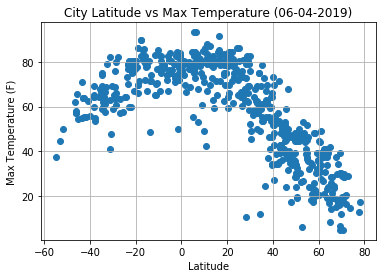

In [35]:
# plot latitude vs temperature
plt.scatter(full_data_df["lat"], full_data_df["max temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({full_data_df.iloc[0]['date']})")
plt.savefig("output_data/LatVsTemp.png")

#### Latitude vs. Humidity Plot

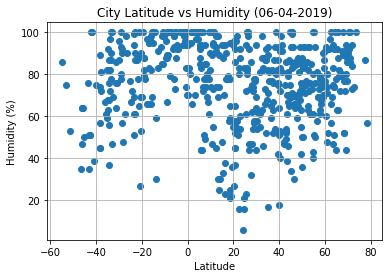

In [11]:
# plot latitude vs percent humidity
plt.scatter(full_data_df["lat"], full_data_df["humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({full_data_df.iloc[0]['date']})")
plt.savefig("output_data/LatVsHumidity.png")

#### Latitude vs. Cloudiness Plot

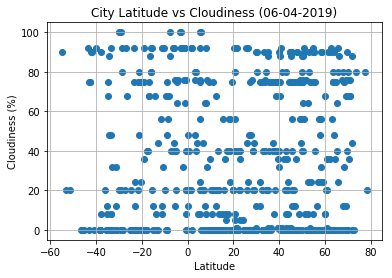

In [34]:
# plot latitude vs percent cloudiness
plt.scatter(full_data_df["lat"], full_data_df["cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({full_data_df.iloc[0]['date']})")
plt.savefig("output_data/LatVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

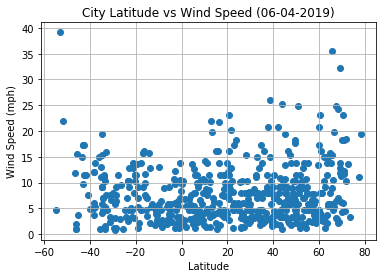

In [13]:
# plot latitude vs wind speed
plt.scatter(full_data_df["lat"], full_data_df["wind speed"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({full_data_df.iloc[0]['date']})")
plt.savefig("output_data/LatVsWindSpeed.png")